In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor

In [72]:
def error(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return

    l = len(data)
    error = np.zeros(l)  # Inizializza un array numpy di zeri della stessa lunghezza di data e model

    for i in range(l):
        if data[i] != 0:
            error[i] = 100 * abs((data[i] - model[i]) / data[i])

    return error


In [73]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        if data[i] == 0:
            error = 0 
        else:
            error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (1 - avg_error)
    
    return accuracy_percentage


In [74]:
model = PySRRegressor()

In [75]:
def bran(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x[0:114],T[0:114], s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()


    axs[1].scatter(x,error(T,T_1),s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')


In [76]:
def branlog(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = 10**(a.predict(x))
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x[0:114],T[0:114], s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()


    axs[1].scatter(x,error(T,T_1),s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

In [77]:
def bran2(x, y, T, alpha):
    a = model.from_file(alpha)
    T_1 = (a.predict(y))
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x[0:114], T[0:114], s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()

    if not isinstance(T, np.ndarray):
        T = np.array(T)

    axs[1].scatter(x, error(T, T_1), s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    
    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

In [78]:
def bran2log(x, y, T, alpha):
    a = model.from_file(alpha)
    T_1 = 10**(a.predict(y))
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x[0:114], T[0:114], s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()

    if not isinstance(T, np.ndarray):
        T = np.array(T)

    axs[1].scatter(x, error(T, T_1), s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    
    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

----
# WITHOUT MASSIVE NEUTRINOS
----

In [9]:
tf = pd.read_csv('TF_16.csv')
k = tf['k (h/Mpc)'].values
z = (tf['k (h/Mpc)']/tf['omega_m']).values
x = tf['x'].values
y = pd.DataFrame({'k': tf['k (h/Mpc)'], 'om_b': tf['omega_b'],'om_m': tf['omega_m']})
T = tf['T(k)'].values
x = x.reshape(-1,1)
z = z.reshape(-1,1)

$$\frac{1}{11.0 \left(\frac{k}{\omega_{m}}\right)^{1.38} + 1}$$

Checking if model1-0709.pkl exists...
Loading model from model1-0709.pkl
Model equation is:  \frac{om_{m}}{11.0 om_{m} \left(\frac{k}{om_{m}}\right)^{1.38} + om_{m}}
The accuracy of the model is:  94.76 %
Max percentage error is:  62.81 %


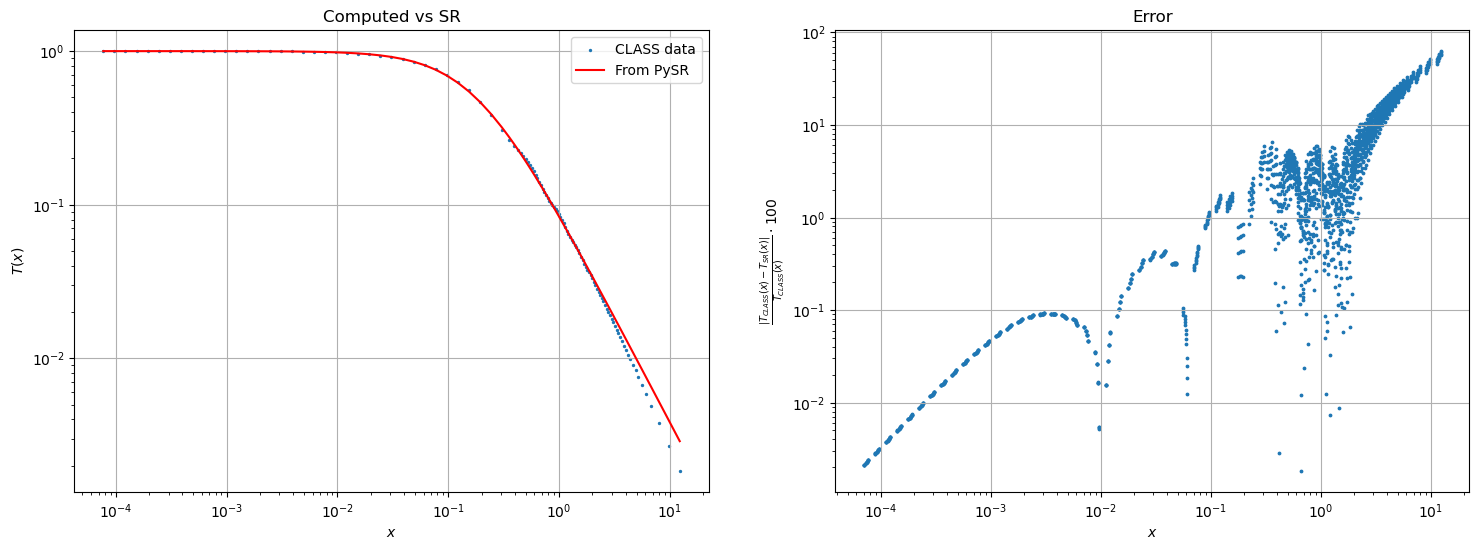

In [81]:
bran2(k/tf['omega_m'],y,T,'model1-0709.pkl')

searching now with
$$z:=\frac{k}{\omega_m}$$
$$- 0.000834^{z} z + \frac{1}{10.76z^{1.48} + 1}$$

Checking if model2-0709.pkl exists...
Loading model from model2-0709.pkl
Model equation is:  - 0.000834^{x_{0}} x_{0} + \frac{0.0928}{x_{0}^{1.48} + 0.0928}
The accuracy of the model is:  97.92 %
Max percentage error is:  26.99 %


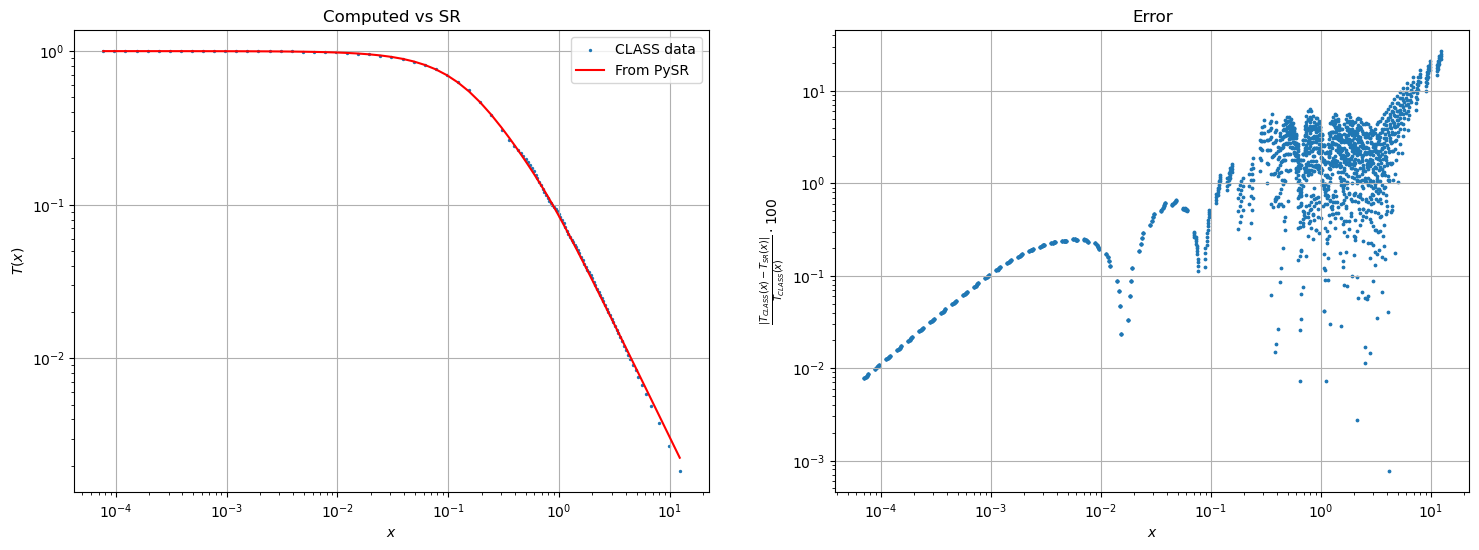

In [80]:
bran(z,T,'model2-0709.pkl')

$$ T(x)=\frac{1}{1+8.88x^{1.40}} $$

Checking if model3-3108.pkl exists...
Loading model from model3-3108.pkl
Model equation is:  - \frac{1.96}{- \frac{17.4 x^{0.0917}}{\left(\frac{1}{x}\right)^{1.31}} - 1.96}
The accuracy of the model is:  96.16 %
Max percentage error is:  44.87 %


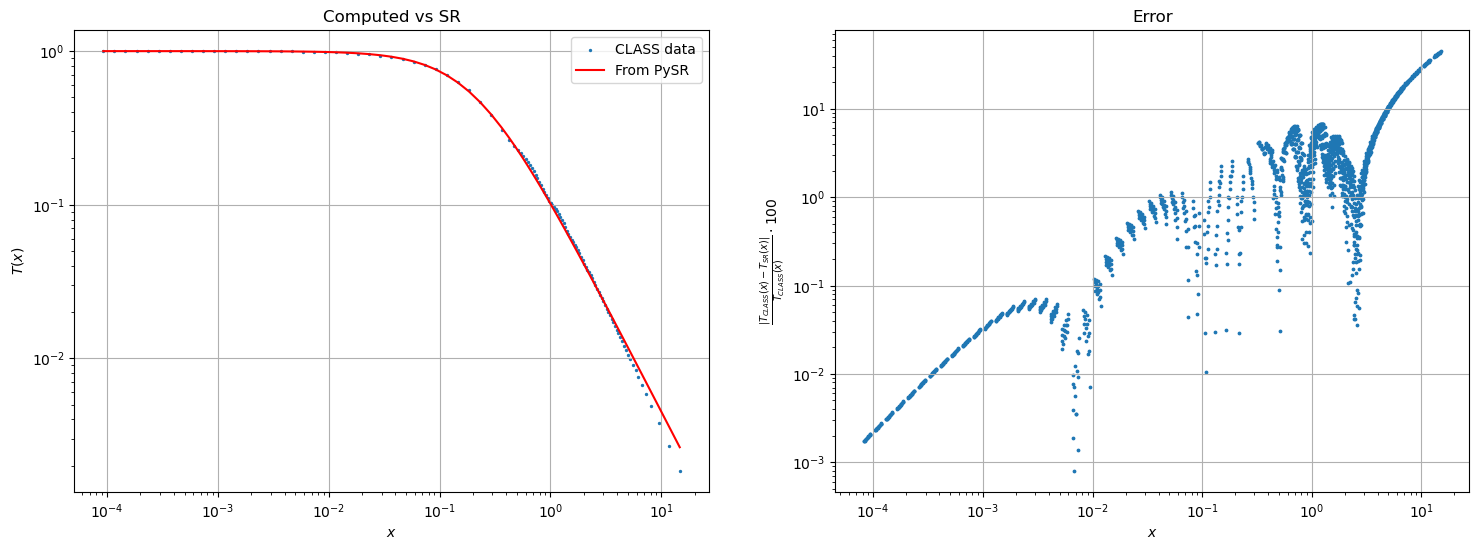

In [82]:
bran(x,T,'model3-3108.pkl')

----
# WITH ONE MASSIVE NEUTRINO
----

In [64]:
tf2 = pd.read_csv('TF_64.csv')
k2 = (tf2['k (h/Mpc)']).values
z2 = (tf2['k (h/Mpc)']/tf2['omega_m']).values
x2 = (tf2['x'].values).reshape(-1,1)
y2 = pd.DataFrame({'k': tf2['k (h/Mpc)'], 'omega_b': tf2['omega_b'],'omega_m': tf2['omega_m'],'omega_nu': tf2['omega_nu']})
T2 = (tf2['T(k)']).values
logT2 = (tf2['log10(T(k))']).values

$$T(x) = \frac{0.642}{5.68 x^{1.37} + 0.642}$$

Checking if hall_of_fame_2023-10-02_102146.993.pkl exists...
Loading model from hall_of_fame_2023-10-02_102146.993.pkl
Model equation is:  - \frac{0.642}{- 5.68 x^{1.37} - 0.642}
The accuracy of the model is:  94.36 %
Max percentage error is:  64.03 %


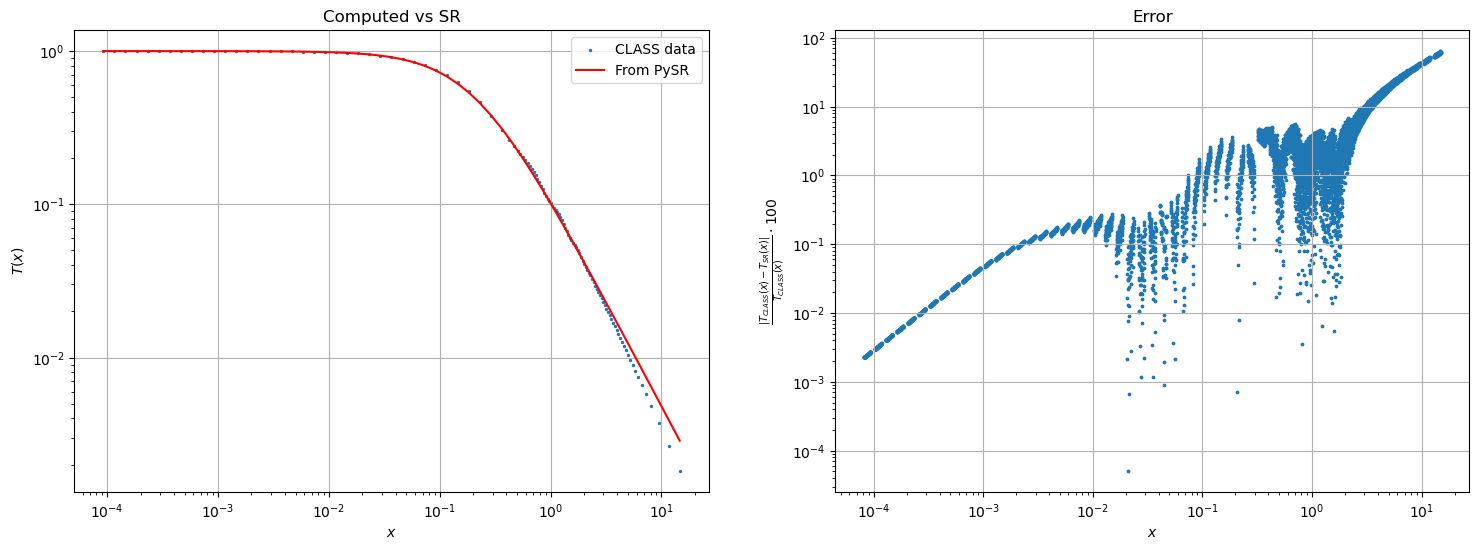

In [87]:
bran(x2,T2,'hall_of_fame_2023-10-02_102146.993.pkl')

----
# $\log T(k)$ 
----

## Without massive neutrinos

$$T(x) = \frac{0.318}{x \left(0.600 x + \log{\left(x \right)} + 2.10\right) + 0.318} $$

Checking if hall_of_fame_2023-10-02_102847.887.pkl exists...
Loading model from hall_of_fame_2023-10-02_102847.887.pkl
Model equation is:  \frac{\log{\left(\frac{0.318}{x \left(0.600 x + \frac{\log{\left(x \right)}}{\log{\left(10 \right)}} + 2.10\right) + 0.318} \right)}}{\log{\left(10 \right)}}
The accuracy of the model is:  98.71 %
Max percentage error is:  4.26 %


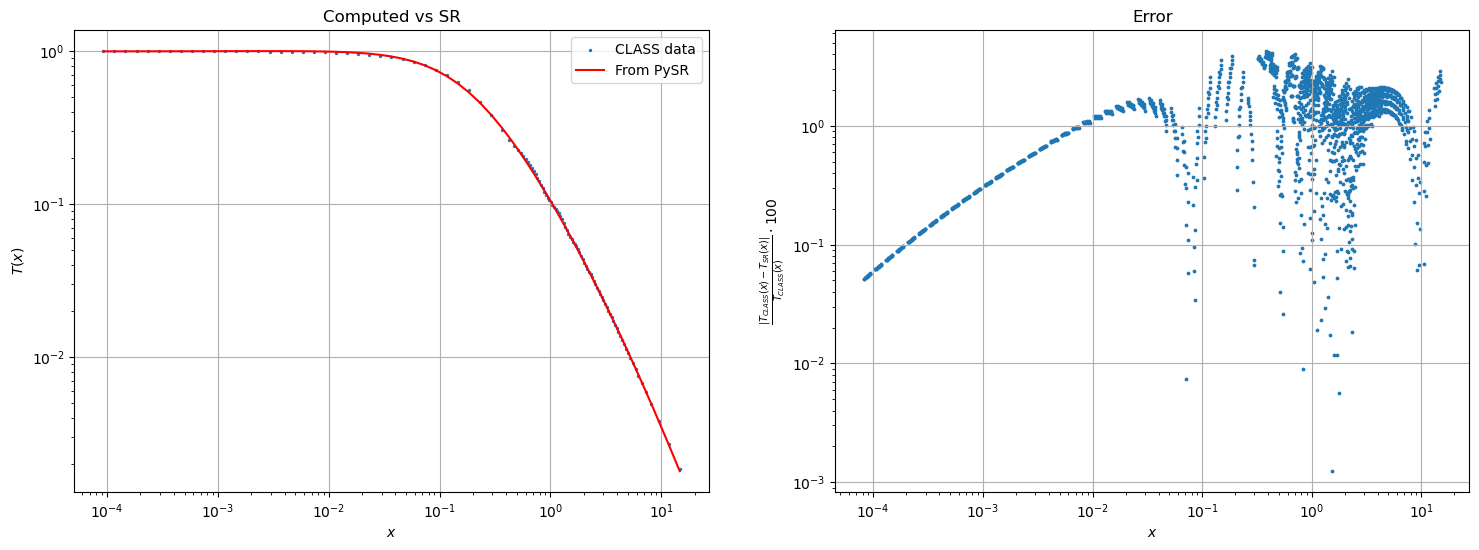

In [88]:
branlog(x,T,'hall_of_fame_2023-10-02_102847.887.pkl')

## With one massive neutrino

$$ \log T(x) = -1.02 \log{\left(0.117^{x} + 1.97 x \left(0.874 x + \frac{\log{\left(x \right)}}{\log{\left(10 \right)}} + 3.83\right) \right)} $$

Checking if hall_of_fame_2023-10-02_103403.018.pkl exists...
Loading model from hall_of_fame_2023-10-02_103403.018.pkl
Model equation is:  - \frac{1.02 \log{\left(0.117^{x} + 1.97 x \left(0.874 x + \frac{\log{\left(x \right)}}{\log{\left(10 \right)}} + 3.83\right) \right)}}{\log{\left(10 \right)}}
The accuracy of the model is:  97.86 %
Max percentage error is:  6.48 %


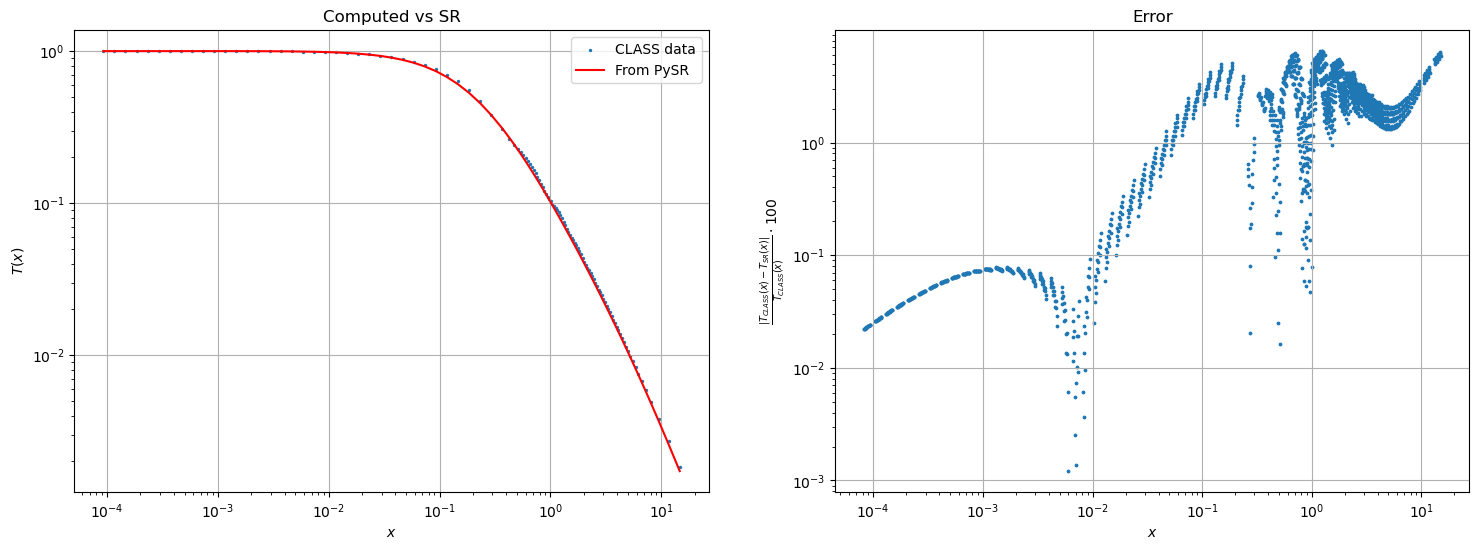

In [90]:
branlog(x,T,'hall_of_fame_2023-10-02_103403.018.pkl')

----
# Using $\chi^2$ as loss function
----

## Without massive neutrinos

$$T(z) = \frac{0.197}{z^{1.08} + 1.12 z^{1.75} + 0.195}$$

Checking if hall_of_fame_2023-09-29_162254.516.pkl exists...
Loading model from hall_of_fame_2023-09-29_162254.516.pkl
Model equation is:  \frac{0.197}{x_{0}^{1.08} + 1.12 x_{0}^{1.75} + 0.195}
The accuracy of the model is:  98.19 %
Max percentage error is:  7.96 %


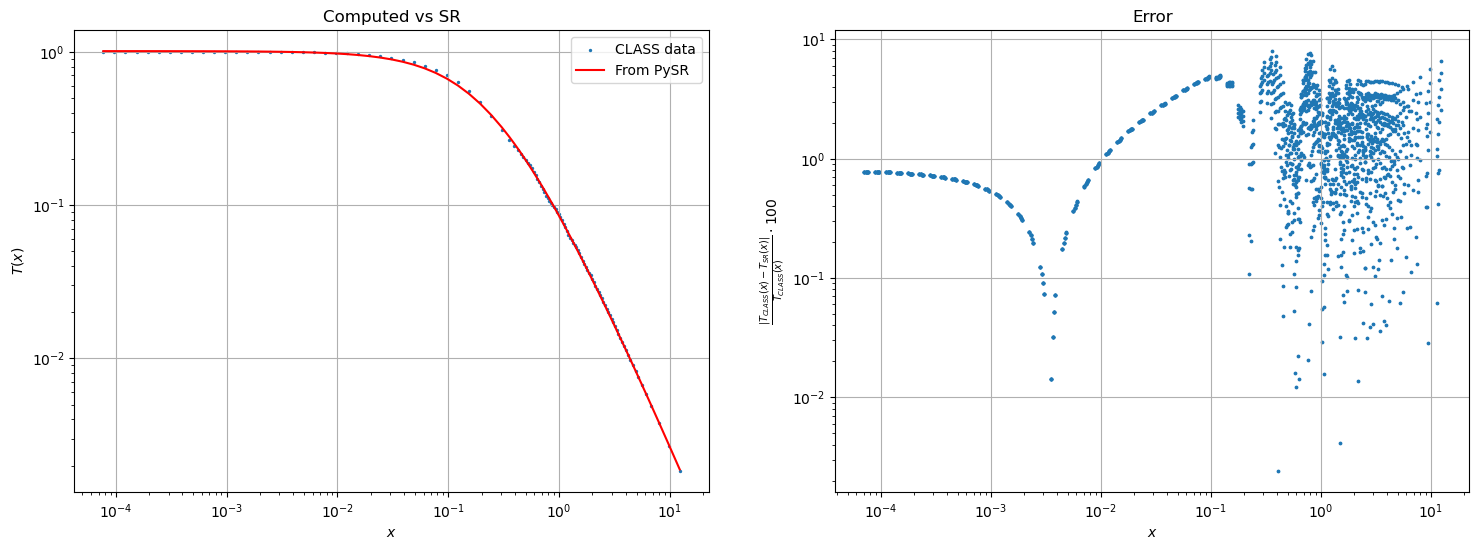

In [79]:
bran(z,T,'hall_of_fame_2023-09-29_162254.516.pkl')

$$ T(x) =  \frac{0.187}{x \left(x^{0.674} + 0.583\right) + 0.187}$$

Checking if hall_of_fame_2023-10-02_101206.854.pkl exists...
Loading model from hall_of_fame_2023-10-02_101206.854.pkl
Model equation is:  \frac{0.187}{x \left(x^{0.674} + 0.583\right) + 0.187}
The accuracy of the model is:  98.08 %
Max percentage error is:  6.19 %


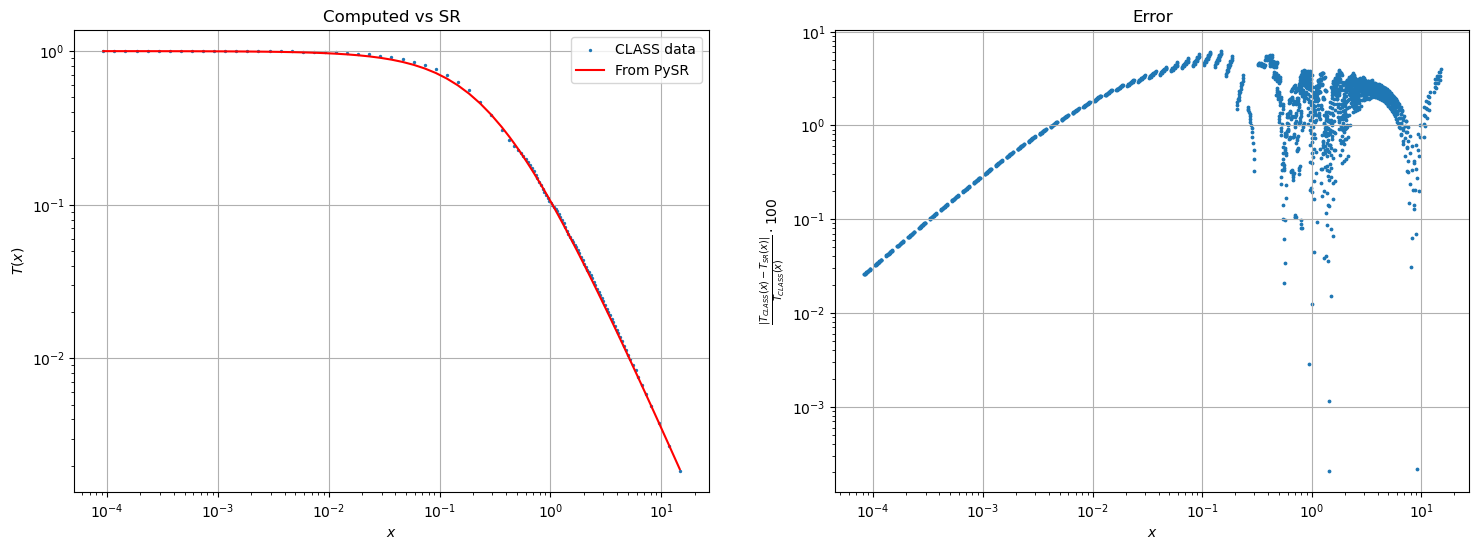

In [86]:
bran(x,T,'hall_of_fame_2023-10-02_101206.854.pkl')

## With one massive neutrino

$$T(x) = \frac{0.470}{x \left(3.32 x^{0.276} + 0.793 x\right) + 0.470}$$

Checking if hall_of_fame_2023-10-02_095118.325.pkl exists...
Loading model from hall_of_fame_2023-10-02_095118.325.pkl
Model equation is:  \frac{0.470}{x \left(3.32 x^{0.276} + 0.793 x\right) + 0.470}
The accuracy of the model is:  98.6 %
Max percentage error is:  6.88 %


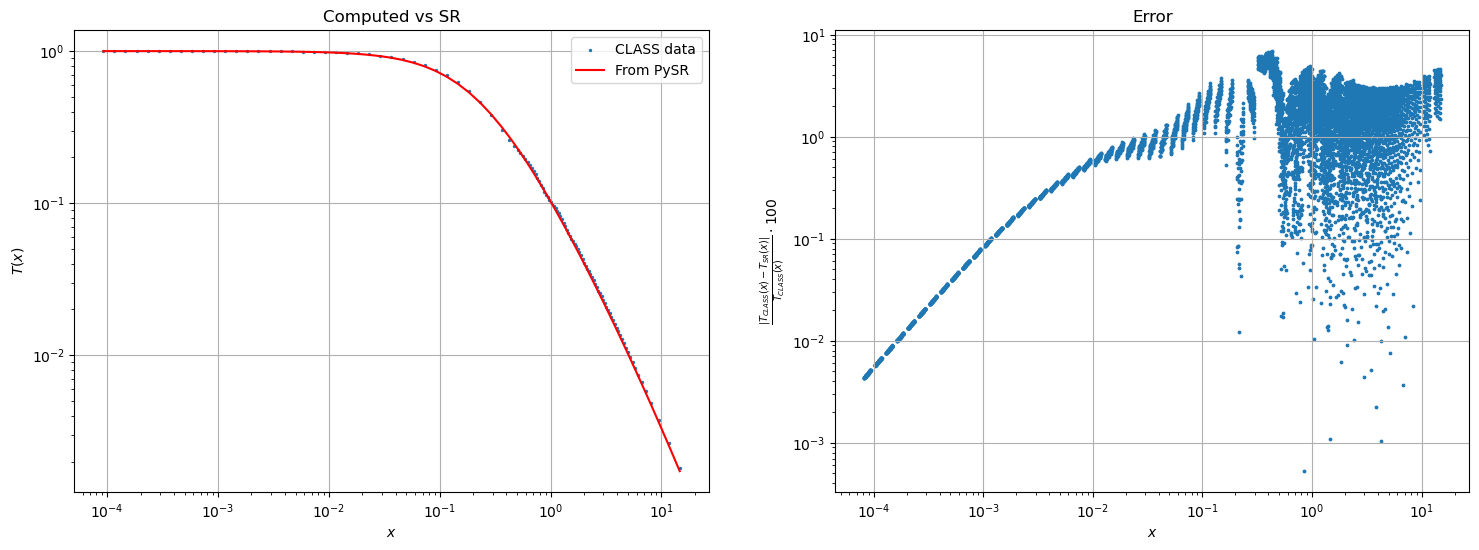

In [85]:
bran(x2,T2,'hall_of_fame_2023-10-02_095118.325.pkl')